<a href="https://colab.research.google.com/github/HiimanshuSherawat/Black_Friday_EDA/blob/main/Black_friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
path=("/content/train.csv")
path1=("/content/test.csv")

In [5]:
df_train=pd.read_csv(path)
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [6]:
df_train.shape

(383980, 12)

In [7]:
df_train.columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383980 entries, 0 to 383979
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     383980 non-null  int64  
 1   Product_ID                  383980 non-null  object 
 2   Gender                      383980 non-null  object 
 3   Age                         383980 non-null  object 
 4   Occupation                  383980 non-null  int64  
 5   City_Category               383980 non-null  object 
 6   Stay_In_Current_City_Years  383979 non-null  object 
 7   Marital_Status              383979 non-null  float64
 8   Product_Category_1          383979 non-null  float64
 9   Product_Category_2          264893 non-null  float64
 10  Product_Category_3          117520 non-null  float64
 11  Purchase                    383979 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 35.2+ MB


In [8]:
df_test=pd.read_csv(path1)
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [9]:
df=df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [10]:
df.shape

(617579, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617579 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     617579 non-null  int64  
 1   Product_ID                  617579 non-null  object 
 2   Gender                      617579 non-null  object 
 3   Age                         617579 non-null  object 
 4   Occupation                  617579 non-null  int64  
 5   City_Category               617579 non-null  object 
 6   Stay_In_Current_City_Years  617578 non-null  object 
 7   Marital_Status              617578 non-null  float64
 8   Product_Category_1          617578 non-null  float64
 9   Product_Category_2          426148 non-null  float64
 10  Product_Category_3          188557 non-null  float64
 11  Purchase                    383979 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 61.3+ MB


In [12]:
df.drop(['User_ID'],axis=1,inplace=True)

In [13]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [14]:
pd.get_dummies(df['Gender'])

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,1,0


In [15]:
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [16]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [17]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [18]:
#not a good method pd.get_dummies(df['Age'],drop_first=True)

In [19]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [20]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [21]:
#we can do label encoding too

In [23]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [25]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [29]:
df.drop('City_Category',axis=1,inplace=True)

In [30]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [34]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2            191431
Product_Category_3            429022
Purchase                      233600
B                                  0
C                                  0
dtype: int64

In [36]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [38]:
df['Product_Category_2'].value_counts()

8.0     72106
14.0    62540
2.0     55876
16.0    48965
15.0    42976
5.0     29480
4.0     29117
6.0     18683
11.0    16028
17.0    15144
13.0    11968
9.0      6449
12.0     6184
10.0     3486
3.0      3270
18.0     3205
7.0       671
Name: Product_Category_2, dtype: int64

In [43]:
df['Product_Category_2'].mode()[0]

8.0

In [46]:
## Replace the missing value with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [47]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2                 0
Product_Category_3            429022
Purchase                      233600
B                                  0
C                                  0
dtype: int64

In [48]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [51]:
df['Product_Category_3'].mode()[0]

16.0

In [52]:
## Replace the missing value with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [60]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].fillna(df['Stay_In_Current_City_Years'].mode()[0])

In [61]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     1
Product_Category_1                 1
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233600
B                                  0
C                                  0
dtype: int64

In [62]:
 df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [63]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0.0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0.0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0.0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0.0,8.0,8.0,16.0,7969.0,0,1


In [64]:
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [65]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0.0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0.0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0.0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0.0,8.0,8.0,16.0,7969.0,0,1


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617579 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  617579 non-null  object 
 1   Gender                      617579 non-null  int64  
 2   Age                         617579 non-null  int64  
 3   Occupation                  617579 non-null  int64  
 4   Stay_In_Current_City_Years  617579 non-null  object 
 5   Marital_Status              617578 non-null  float64
 6   Product_Category_1          617578 non-null  float64
 7   Product_Category_2          617579 non-null  float64
 8   Product_Category_3          617579 non-null  float64
 9   Purchase                    383979 non-null  float64
 10  B                           617579 non-null  uint8  
 11  C                           617579 non-null  uint8  
dtypes: float64(5), int64(3), object(2), uint8(2)
memory usage: 53.0+ MB


In [67]:
# convert object into integer
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617579 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  617579 non-null  object 
 1   Gender                      617579 non-null  int64  
 2   Age                         617579 non-null  int64  
 3   Occupation                  617579 non-null  int64  
 4   Stay_In_Current_City_Years  617579 non-null  int64  
 5   Marital_Status              617578 non-null  float64
 6   Product_Category_1          617578 non-null  float64
 7   Product_Category_2          617579 non-null  float64
 8   Product_Category_3          617579 non-null  float64
 9   Purchase                    383979 non-null  float64
 10  B                           617579 non-null  uint8  
 11  C                           617579 non-null  uint8  
dtypes: float64(5), int64(4), object(1), uint8(2)
memory usage: 53.0+ MB


In [69]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617579 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  617579 non-null  object 
 1   Gender                      617579 non-null  int64  
 2   Age                         617579 non-null  int64  
 3   Occupation                  617579 non-null  int64  
 4   Stay_In_Current_City_Years  617579 non-null  int64  
 5   Marital_Status              617578 non-null  float64
 6   Product_Category_1          617578 non-null  float64
 7   Product_Category_2          617579 non-null  float64
 8   Product_Category_3          617579 non-null  float64
 9   Purchase                    383979 non-null  float64
 10  B                           617579 non-null  int64  
 11  C                           617579 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 61.3+ MB


ValueError: ignored

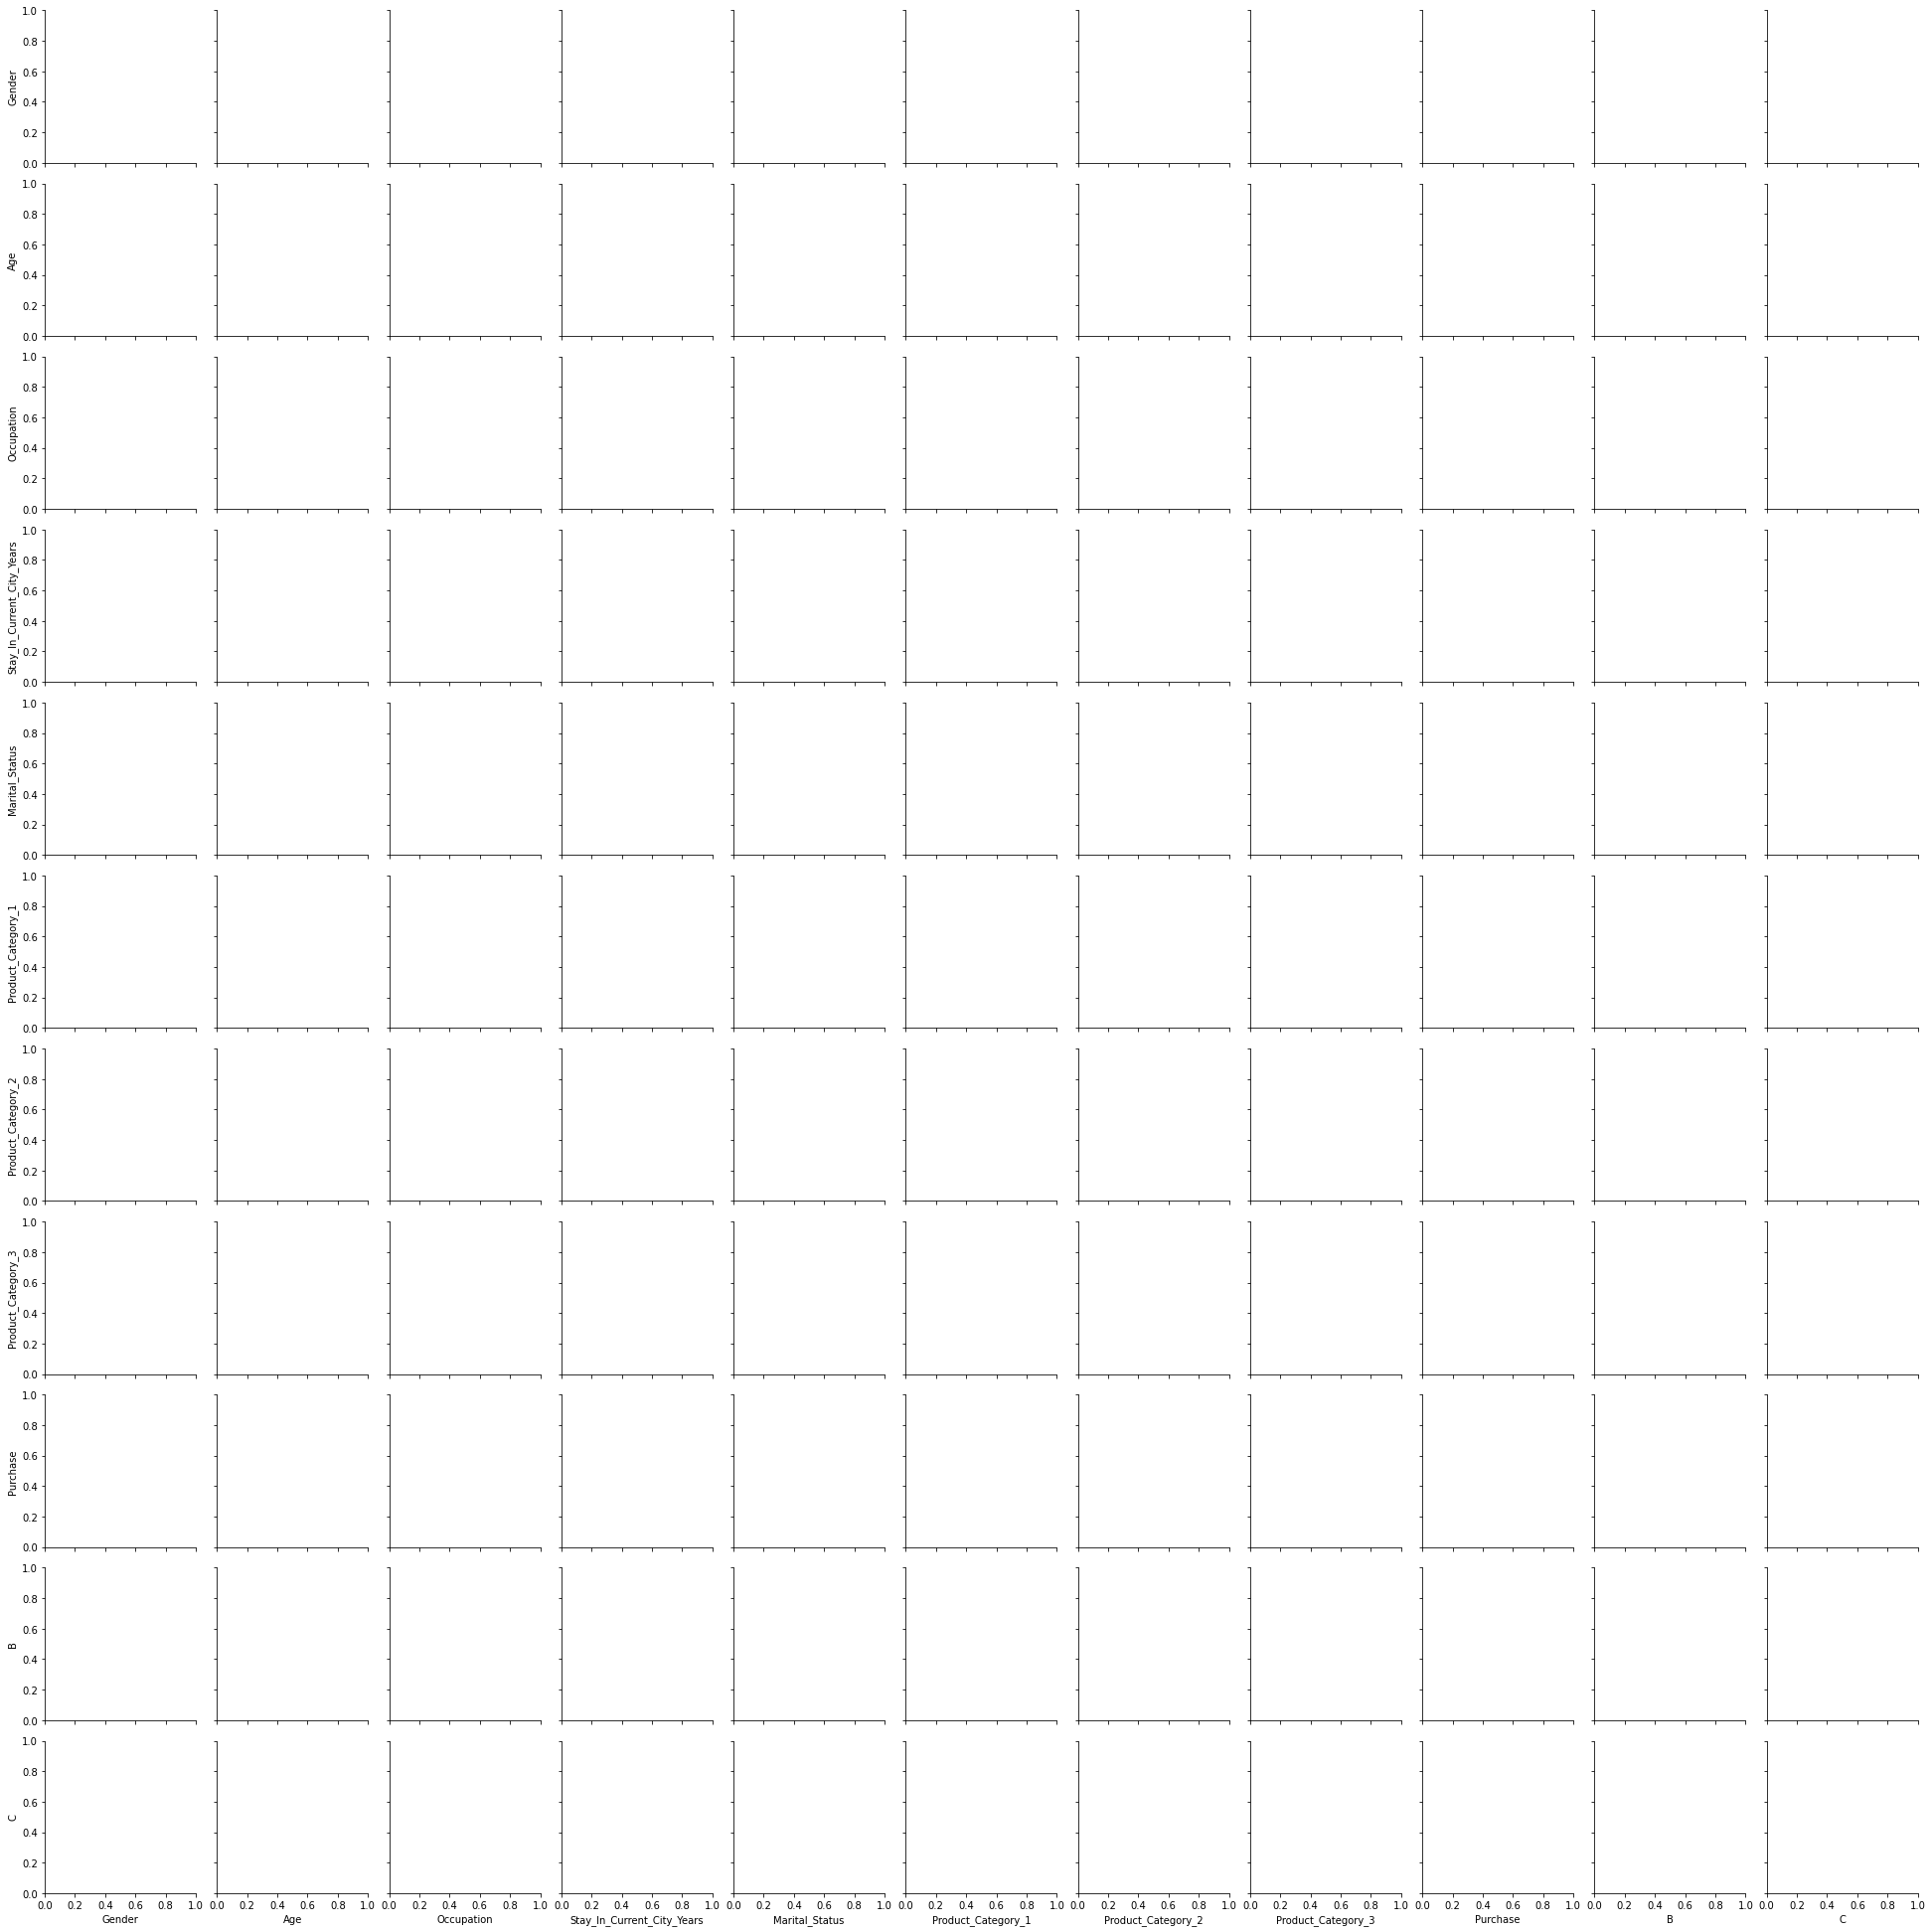

In [71]:
#visualisation
sns.pairplot(df)

In [72]:
df[df.index.duplicated()]

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1.0,1.0,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0.0,3.0,5.0,16.0,NaN,0,1
2,P00288442,0,4,1,4,1.0,5.0,14.0,16.0,NaN,1,0
3,P00145342,0,4,1,4,1.0,4.0,9.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0.0,4.0,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1.0,8.0,8.0,16.0,NaN,1,0
233595,P00254642,0,3,15,4,1.0,5.0,8.0,16.0,NaN,1,0
233596,P00031842,0,3,15,4,1.0,1.0,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,4,0.0,10.0,16.0,16.0,NaN,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


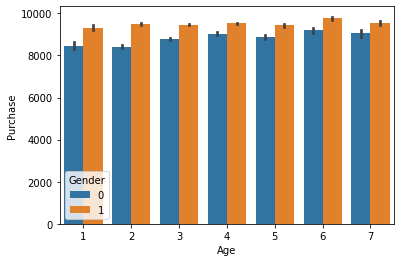

In [74]:
sns.barplot('Age','Purchase',hue='Gender', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


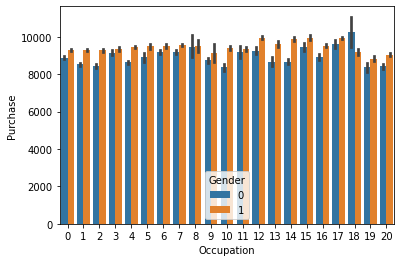

In [75]:
sns.barplot('Occupation','Purchase',hue='Gender', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


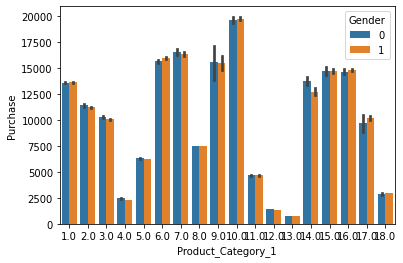

In [76]:
sns.barplot('Product_Category_1','Purchase',hue='Gender', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


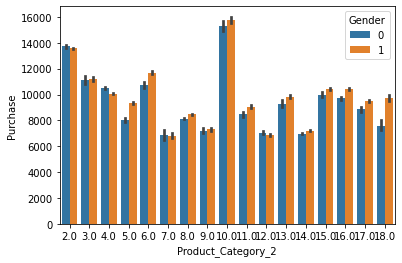

In [77]:
sns.barplot('Product_Category_2','Purchase',hue='Gender', data=df)

In [78]:
#Feature Scaling
df_test=df[df['Purchase'].isnull()]
df_train=df[~df['Purchase'].isnull()]

In [83]:
X=df_train.drop('Purchase',axis=1)
y=df_train['Purchase']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [89]:
X_train.drop('Product_ID',axis=1)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
271527,1,3,7,0,1.0,1.0,16.0,16.0,1,0
170939,0,3,14,3,0.0,1.0,2.0,5.0,1,0
139050,1,2,7,1,0.0,8.0,8.0,16.0,1,0
275353,1,2,11,3,0.0,1.0,6.0,15.0,0,0
261171,0,5,17,2,0.0,8.0,8.0,16.0,0,1
...,...,...,...,...,...,...,...,...,...,...
259178,1,3,14,2,1.0,5.0,8.0,16.0,0,1
365838,0,2,1,1,0.0,5.0,8.0,16.0,1,0
131932,0,2,4,2,0.0,8.0,14.0,16.0,1,0
146867,1,3,0,0,0.0,8.0,8.0,16.0,0,1


In [90]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

ValueError: ignored